<a href="https://colab.research.google.com/github/laysch/verizon-fwa/blob/main/Verizon2_Laila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/
!ls
%cd 'Verizon2-Laila'

Mounted at /content/drive
/content/drive/My Drive
'BTT003_U1_course-transcript (1).pdf'
 BTT003_U1_course-transcript.pdf
'BTT003_U2_course-transcript (1).pdf'
 BTT003_U2_course-transcript.pdf
'BTT003_U3_course-transcript (1).pdf'
'BTT003_U3_course-transcript (2).pdf'
'BTT003_U3_course-transcript (3).pdf'
 BTT003_U3_course-transcript.pdf
'BTT003_U4_course-transcript (1).pdf'
 BTT003_U4_course-transcript.pdf
'BTT003_U5_course-transcript (1).pdf'
 BTT003_U5_course-transcript.pdf
 BTT003_U6_course-transcript.pdf
 BTT003_U7_course-transcript.pdf
 BTT003_U8_course-transcript.pdf
 BTT003_U9_course-transcript.pdf
'BTT AI - Unit Transcripts'
 CertificateReport.pdf
'Colab Notebooks'
'Copy of Professional Roadmap [TEMPLATE].gdoc'
'Copy of [TEMPLATE] Project Scope and Deliverables_Fall 2023 AI Studio (1).gdoc'
'Copy of [TEMPLATE] Project Scope and Deliverables_Fall 2023 AI Studio.gdoc'
'Course Withdrawal fillable.pdf'
 Laila-Verizon2.ipynb
 population-2022data.xlsx
 population-data-changes.xlsx
 V

get data and check features

In [ ]:

# File path within the 'Verizon2-Laila' directory after mounting Google Drive
file_path = '/content/drive/My Drive/population-data-changes.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows to verify the data
print(df.head())


  table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)  \
0  Table 1. Annual Estimates of the Resident Popu...                                                             
1                                    Geographic Area                                                             
2                                                NaN                                                             
3                                      United States                                                             
4                                          Northeast                                                             

            Unnamed: 1      Unnamed: 2                          Unnamed: 3  \
0                  NaN             NaN                                 NaN   
1  2010-04-01 00:00:00             NaN  Population Estimate (as of July 1)   
2               Census  Estimates Base                                2010   
3  

In [ ]:
import pandas as pd


df.columns = df.iloc[2]


df = df.drop([0, 1, 2])

# Reset the index
df.reset_index(drop=True, inplace=True)

print(df)


2                 Midwest   66974416   67157800.0   67336743.0   67560379.0  \
0                   South  114866680  116006522.0  117241208.0  118364400.0   
1                    West   72100436   72788329.0   73477823.0   74167130.0   
2                .Alabama    4785437    4799069.0    4815588.0    4830081.0   
3                 .Alaska     713910     722128.0     730443.0     737068.0   
4                .Arizona    6407172    6472643.0    6554978.0    6632764.0   
5               .Arkansas    2921964    2940667.0    2952164.0    2959400.0   
6             .California   37319502   37638369.0   37948800.0   38260787.0   
7               .Colorado    5047349    5121108.0    5192647.0    5269035.0   
8            .Connecticut    3579114    3588283.0    3594547.0    3594841.0   
9               .Delaware     899593     907381.0     915179.0     923576.0   
10  .District of Columbia     605226     619800.0     634924.0     650581.0   
11               .Florida   18845537   19053237.0   

In [ ]:

df_cleaned = df.dropna()

print(df_cleaned)


df_cleaned = df.dropna(axis=1)

print(df_cleaned)


2                     NaN     Census Estimates Base       2010       2011.0  \
0           United States  308745538      308758105  309321666  311556874.0   
1               Northeast   55317240       55318443   55380134   55604223.0   
2                 Midwest   66927001       66929725   66974416   67157800.0   
3                   South  114555744      114563030  114866680  116006522.0   
4                    West   71945553       71946907   72100436   72788329.0   
5                .Alabama    4779736        4780125    4785437    4799069.0   
6                 .Alaska     710231         710249     713910     722128.0   
7                .Arizona    6392017        6392288    6407172    6472643.0   
8               .Arkansas    2915918        2916031    2921964    2940667.0   
9             .California   37253956       37254519   37319502   37638369.0   
10              .Colorado    5029196        5029319    5047349    5121108.0   
11           .Connecticut    3574097        3574147 

In [ ]:
df.round()


2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66927001,66929725,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114555744,114563030,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,71945553,71946907,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(["Census"], axis=1)



In [ ]:
df = df.drop(["Estimates Base"], axis=1)
df

2,NaN,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
...,...,...,...,...,...,...,...,...,...,...,...
58,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[:-5]
df

2,NaN,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [ ]:
df

2,NaN,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [ ]:
# Replace 'NaN' in column names with 'States'
df.columns = ['States' if pd.isnull(col) else col for col in df.columns]


print(df.columns.tolist())



['States', 2010, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]


In [ ]:
df

,States,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [ ]:
# Replace the column names with updated year values (removing decimal points)
df.columns = [int(col) if isinstance(col, float) else col for col in df.columns]

print(df.columns.tolist())
df


['States', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


,States,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [ ]:
df

,States,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


## **Data Modeling**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

states = df['States'].unique()

for state in states:
    state_data = df[df['States'] == state].iloc[:, 1:].values.astype(float)

    if len(state_data) <= 3:
        print(f"Not enough data for {state}. Skipping...")
        continue

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(state_data)

    look_back = 3
    X, y = [], []
    for i in range(len(scaled_data)-look_back-1):
        X.append(scaled_data[i:(i+look_back), :])
        y.append(scaled_data[i + look_back, :])

    X = np.array(X)
    y = np.array(y)

    if X.size == 0 or y.size == 0:
        print(f"Empty data for {state}. Skipping...")
        continue

    n_features = state_data.shape[1]
    X = np.reshape(X, (X.shape[0], look_back, n_features))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model.add(LSTM(units=50))
    model.add(Dense(units=n_features))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X, y, epochs=100, batch_size=1, verbose=2)

    forecast_input = scaled_data[-look_back:, :].reshape(1, look_back, n_features)
    forecast = model.predict(forecast_input)
    forecast = scaler.inverse_transform(forecast)

    print(f"Forecast for {state}: {forecast}")


Not enough data for United States. Skipping...
Not enough data for Northeast. Skipping...
Not enough data for Midwest. Skipping...
Not enough data for South. Skipping...
Not enough data for West. Skipping...
Not enough data for .Alabama. Skipping...
Not enough data for .Alaska. Skipping...
Not enough data for .Arizona. Skipping...
Not enough data for .Arkansas. Skipping...
Not enough data for .California. Skipping...
Not enough data for .Colorado. Skipping...
Not enough data for .Connecticut. Skipping...
Not enough data for .Delaware. Skipping...
Not enough data for .District of Columbia. Skipping...
Not enough data for .Florida. Skipping...
Not enough data for .Georgia. Skipping...
Not enough data for .Hawaii. Skipping...
Not enough data for .Idaho. Skipping...
Not enough data for .Illinois. Skipping...
Not enough data for .Indiana. Skipping...
Not enough data for .Iowa. Skipping...
Not enough data for .Kansas. Skipping...
Not enough data for .Kentucky. Skipping...
Not enough data for

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'df' contains the dataset with columns 'States', '2010', '2011', ..., '2019'

# Group the data by state
grouped_states = df.set_index('States').T.to_dict('list')

# Initialize a dictionary to store forecasts for each state
forecasts = {}

for state, data in grouped_states.items():
    # Extract population data for the state
    state_data = np.array(data).reshape(-1, 1)

    # Augment the dataset to increase data points (if needed)
    augmented_data = np.repeat(state_data, 10, axis=0)

    # Reshape the augmented dataset for LSTM
    augmented_data = augmented_data.reshape(10, -1, 1)

    # Build and train LSTM model for each state
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(None, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(augmented_data, augmented_data, epochs=100, batch_size=1, verbose=0)

    # Forecast future population changes for the next 10 years
    forecast_input = augmented_data[-1:, :, :]  # Use the last sequence as input for forecasting
    forecast = model.predict(forecast_input)

    # Store the forecast for the state
    forecasts[state] = forecast.flatten().tolist()

# 'forecasts' dictionary now contains the predicted population for each state for the next 10 years
print(forecasts)




1/1 [==============================] - 1s 878ms/step


1/1 [==============================] - 1s 607ms/step


1/1 [==============================] - 1s 685ms/step


KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


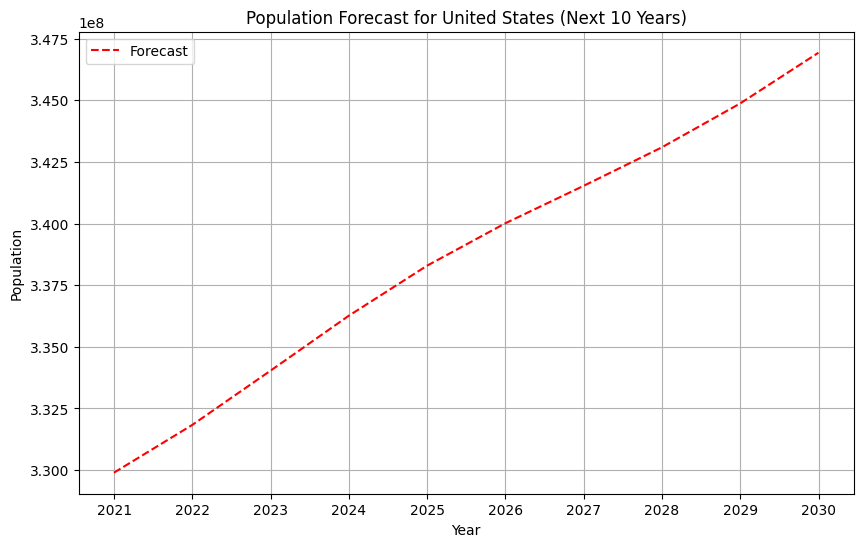

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Extract the population time series for the United States
us_population = df[df['States'] == 'United States'].iloc[:, 1:].values.flatten()

# Convert the data to numeric and handle any missing values
us_population = pd.to_numeric(us_population, errors='coerce')
us_population = us_population[~pd.isnull(us_population)]  # Remove NaN values if any

# Define the ARIMA model
order = (5, 1, 0)  # Example order (p, d, q)
model = ARIMA(us_population, order=order)

# Fit the ARIMA model
model_fit = model.fit()

# Predict the next 10 years
forecast_years = 10
forecast = model_fit.forecast(steps=forecast_years)

# Generate future years starting from the last available year in the dataset
last_year = int(df.columns[-1])  # Extract the last available year
future_years = pd.date_range(start=str(last_year + 1), periods=forecast_years, freq='Y')

# Plotting the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(future_years, forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast for United States (Next 10 Years)')
plt.legend()
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

LinAlgError: ignored

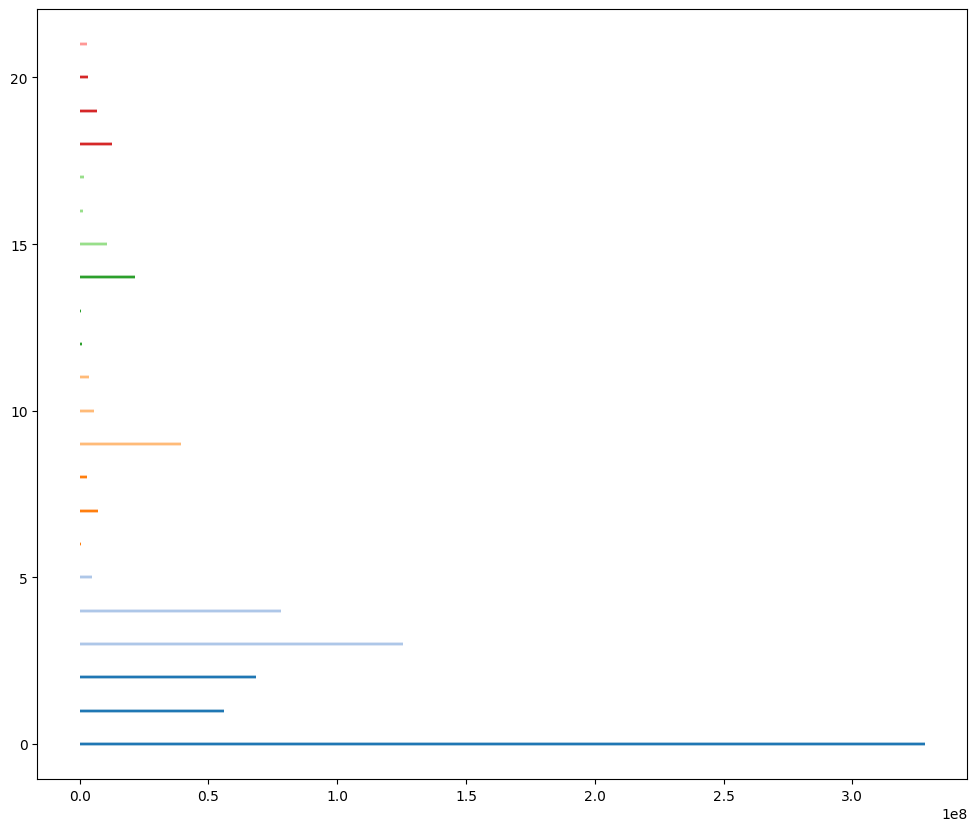

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded as 'df'

# Extract the states and their population data
states = df['States'].tolist()
population_data = df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)  # Example order (p, d, q)

# Create a subplot
plt.figure(figsize=(12, 10))

# Loop through each state to forecast and plot
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast and plot
    if len(us_population) > 0:
        # Convert the data to numeric and handle NaN values
        us_population = np.nan_to_num(us_population)

        model = ARIMA(us_population, order=order)
        model_fit = model.fit()
        forecast_years = 10
        forecast = model_fit.forecast(steps=forecast_years)

        # Generate future years starting from the last available year in the dataset
        last_year = population_data.columns[-1]
        future_years = np.arange(int(last_year) + 1, int(last_year) + 1 + forecast_years)

        # Repeat the population value to align with each future year
        future_population = np.repeat(us_population[-1], forecast_years)

        # Plotting horizontal lines for each state's population projection
        for year, pop in zip(future_years, future_population):
            plt.hlines(y=i, xmin=pop, xmax=year, color=plt.cm.tab20(i / len(states)), label=state)

# Set yticks and labels for each state
plt.yticks(range(len(states)), states)
plt.ylabel('States')
plt.xlabel('Population')
plt.title('Population Forecast for Each State (2020-2029)')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

LinAlgError: ignored

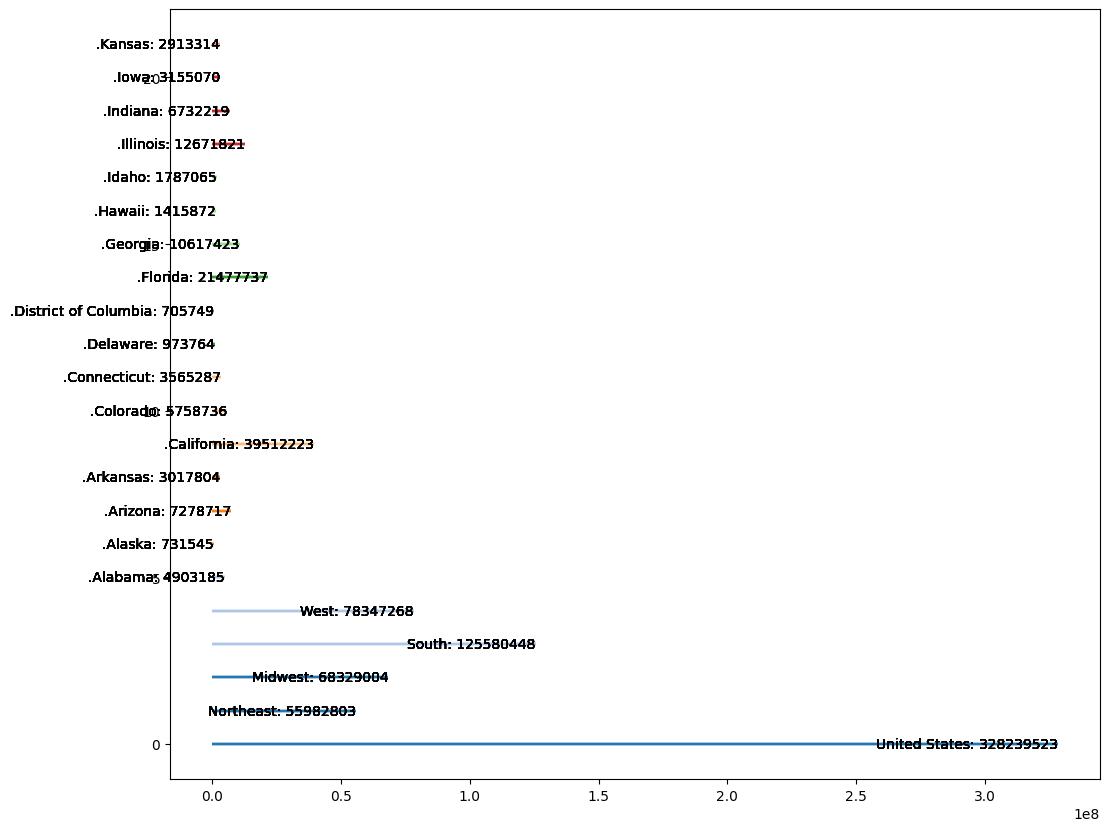

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded as 'df'

# Extract the states and their population data
states = df['States'].tolist()
population_data = df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)  # Example order (p, d, q)

# Create a subplot
plt.figure(figsize=(12, 10))

# Loop through each state to forecast and plot
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast and plot
    if len(us_population) > 0:
        # Convert the data to numeric and handle NaN values
        us_population = np.nan_to_num(us_population)

        model = ARIMA(us_population, order=order)
        model_fit = model.fit()
        forecast_years = 10
        forecast = model_fit.forecast(steps=forecast_years)

        # Generate future years starting from the last available year in the dataset
        last_year = population_data.columns[-1]
        future_years = np.arange(int(last_year) + 1, int(last_year) + 1 + forecast_years)

        # Repeat the population value to align with each future year
        future_population = np.repeat(us_population[-1], forecast_years)

        # Plotting horizontal lines for each state's population projection
        for year, pop in zip(future_years, future_population):
            plt.hlines(y=i, xmin=pop, xmax=year, color=plt.cm.tab20(i / len(states)))
            plt.text(x=pop, y=i, s=f'{state}: {int(pop)}', ha='right', va='center', color='black')

# Set yticks and labels for each state
plt.yticks(range(len(states)), states)
plt.ylabel('States')
plt.xlabel('Population')
plt.title('Population Forecast for Each State (2020-2029)')
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Encountered an error for .Kentucky: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Encountered an error for .Virginia: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


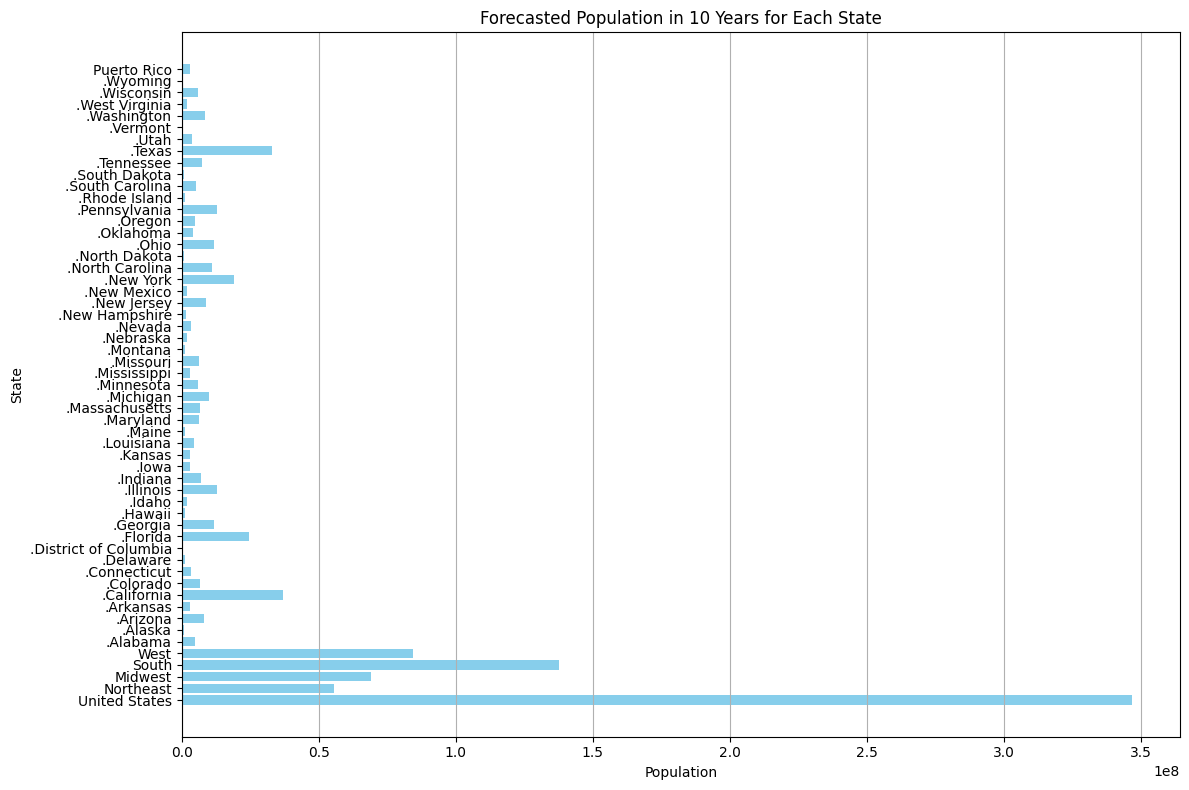

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded as 'df'

# Extract the states and their population data
states = df['States'].tolist()
population_data = df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)  # Example order (p, d, q)

# Create a figure
plt.figure(figsize=(12, 8))

# Lists to store forecasted populations and state names
forecasted_populations = []
state_labels = []

# Loop through each state to forecast
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast
    if len(us_population) > 0:
        try:
            # Convert the data to numeric and handle NaN values
            us_population = np.nan_to_num(us_population)

            model = ARIMA(us_population, order=order)
            model_fit = model.fit()
            forecast_years = 10
            forecast = model_fit.forecast(steps=forecast_years)

            # Store the forecasted population and state name
            forecasted_populations.append(forecast[-1])  # Get the population after 10 years
            state_labels.append(state)
        except Exception as e:
            print(f"Encountered an error for {state}: {e}")

# Plotting the bar graph
plt.barh(state_labels, forecasted_populations, color='skyblue')
plt.xlabel('Population')
plt.ylabel('State')
plt.title('Forecasted Population in 10 Years for Each State')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Encountered an error for .Kentucky: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Encountered an error for .Virginia: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


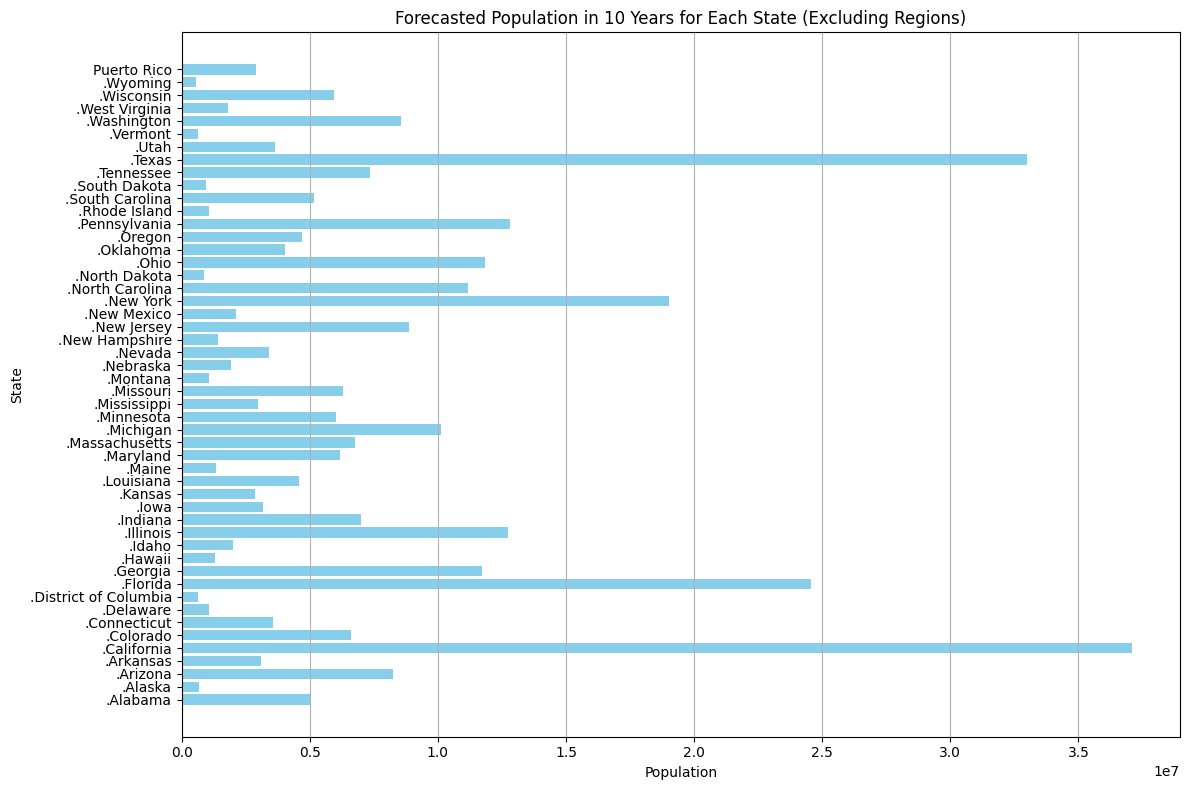

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded as 'df'

# Define the regions to exclude
exclude_regions = ['United States', 'Northeast', 'Midwest', 'South', 'West']

# Filter the DataFrame to exclude the specified regions
filtered_df = df[~df['States'].isin(exclude_regions)]

# Extract the states and their population data after filtering
states = filtered_df['States'].tolist()
population_data = filtered_df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)  # Example order (p, d, q)

# Create a figure
plt.figure(figsize=(12, 8))

# Lists to store forecasted populations and state names
forecasted_populations = []
state_labels = []

# Loop through each state to forecast
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast
    if len(us_population) > 0:
        try:
            # Convert the data to numeric and handle NaN values
            us_population = np.nan_to_num(us_population)

            model = ARIMA(us_population, order=order)
            model_fit = model.fit()
            forecast_years = 10
            forecast = model_fit.forecast(steps=forecast_years)

            # Store the forecasted population and state name
            forecasted_populations.append(forecast[-1])  # Get the population after 10 years
            state_labels.append(state)
        except Exception as e:
            print(f"Encountered an error for {state}: {e}")

# Plotting the bar graph
plt.barh(state_labels, forecasted_populations, color='skyblue')
plt.xlabel('Population')
plt.ylabel('State')
plt.title('Forecasted Population in 10 Years for Each State (Excluding Regions)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


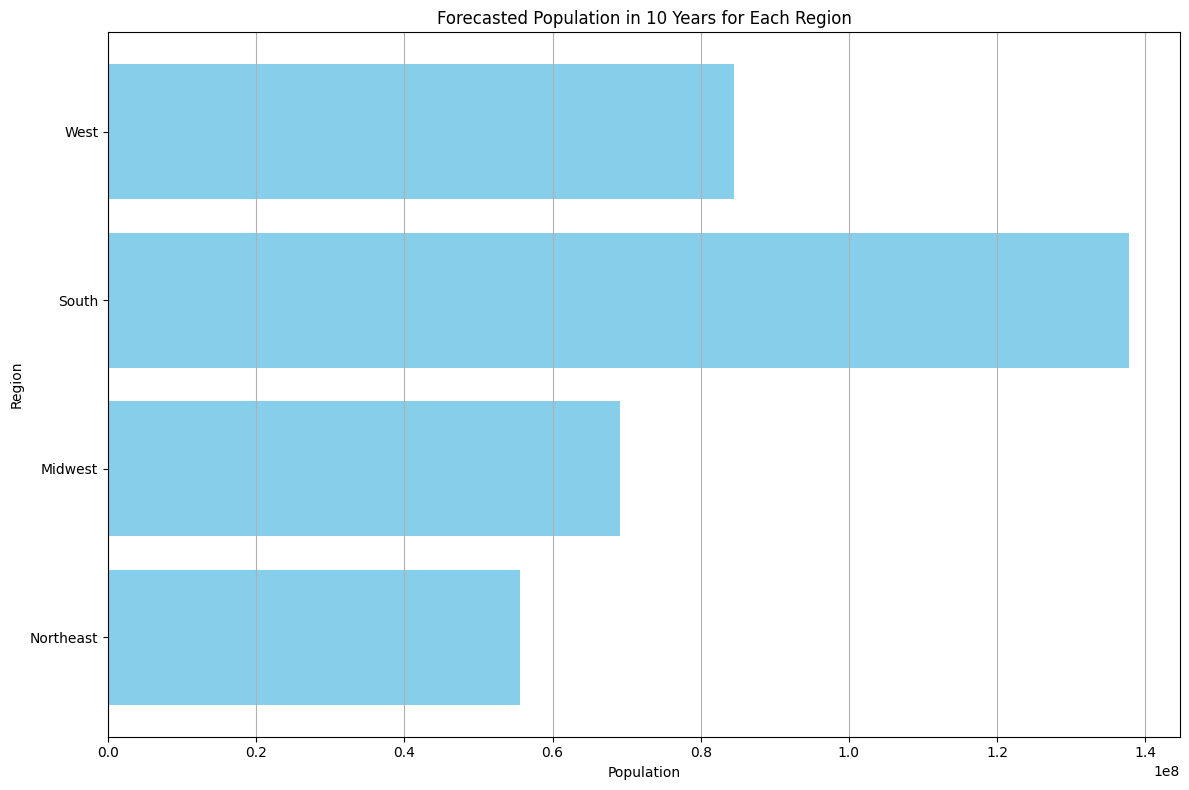

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Define the regions to include
include_regions = ['Northeast', 'Midwest', 'South', 'West']


filtered_df = df[df['States'].isin(include_regions)]


states = filtered_df['States'].tolist()
population_data = filtered_df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)

# figure
plt.figure(figsize=(12, 8))

# Lists to store forecasted populations and state names
forecasted_populations = []
state_labels = []

# Loop through each state to forecast
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast
    if len(us_population) > 0:
        try:
            # Convert the data to numeric and handle NaN values
            us_population = np.nan_to_num(us_population)

            model = ARIMA(us_population, order=order)
            model_fit = model.fit()
            forecast_years = 10
            forecast = model_fit.forecast(steps=forecast_years)

            # Store the forecasted population and state name
            forecasted_populations.append(forecast[-1])  # Get the population after 10 years
            state_labels.append(state)
        except Exception as e:
            print(f"Encountered an error for {state}: {e}")


plt.barh(state_labels, forecasted_populations, color='skyblue')
plt.xlabel('Population')
plt.ylabel('Region')
plt.title('Forecasted Population in 10 Years for Each Region')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


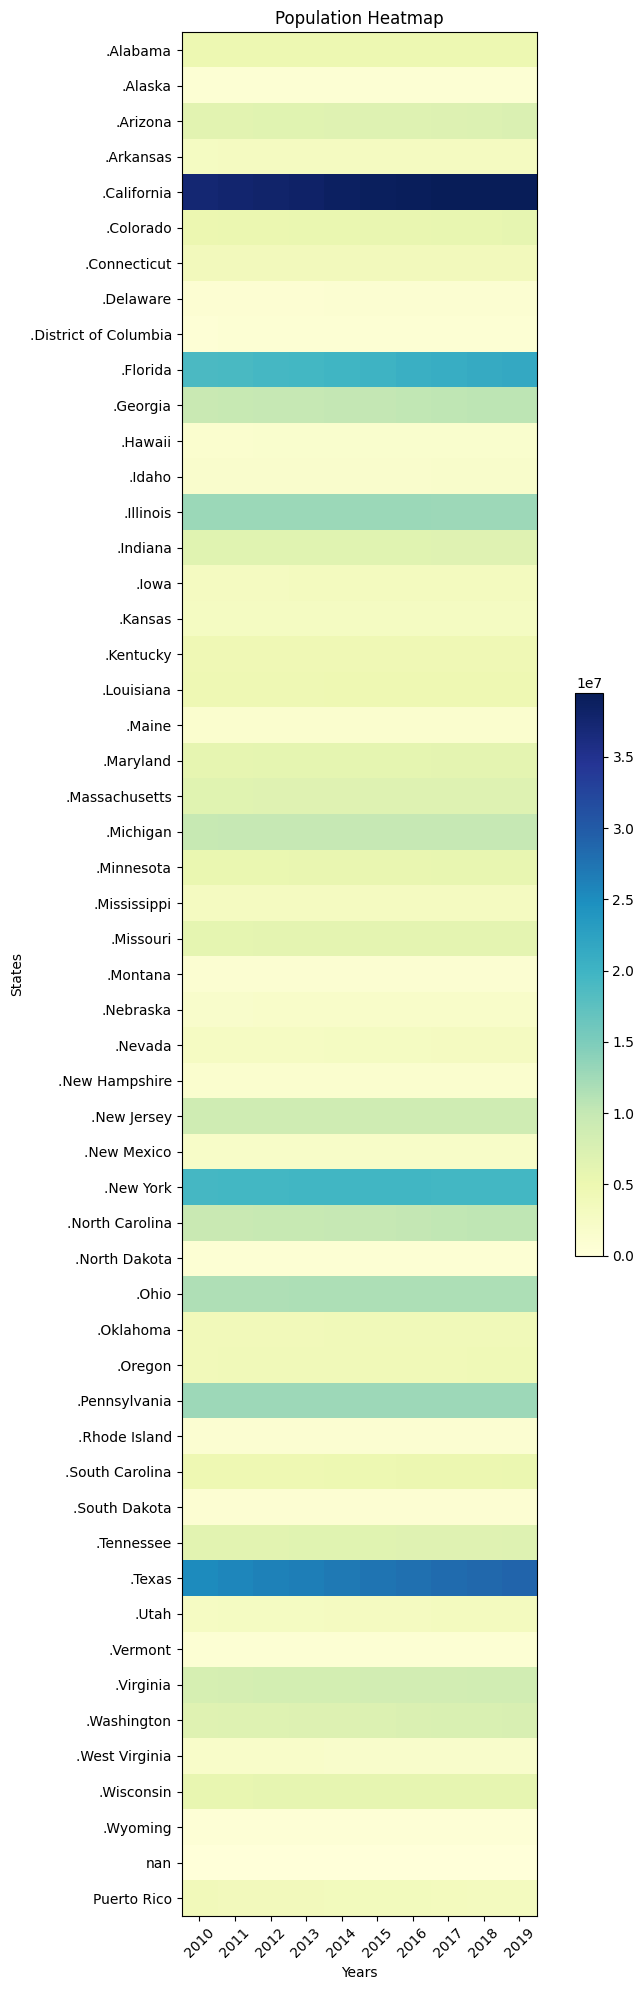

In [ ]:
# Convert the population_data to numeric format and handle missing values
population_data = population_data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with zeros or any preferred method
population_data.fillna(0, inplace=True)

# Create a heatmap using the processed data
plt.figure(figsize=(10, 20))
heatmap = plt.imshow(population_data, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(heatmap, fraction=0.03, pad=0.04)
plt.xticks(ticks=range(len(df.columns[1:])), labels=df.columns[1:], rotation=45)
plt.yticks(ticks=range(len(states)), labels=states)
plt.xlabel('Years')
plt.ylabel('States')
plt.title('Population Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

exclude_regions = ['United States', 'Northeast', 'Midwest', 'South', 'West']


filtered_df = df[~df['States'].isin(exclude_regions)]


states = filtered_df['States'].tolist()
population_data = filtered_df.iloc[:, 1:]

# Define the ARIMA model order
order = (5, 1, 0)  # Example order (p, d, q)

# Loop through each state to forecast
for i, state in enumerate(states):
    us_population = population_data.iloc[i].dropna().values.astype(float)

    # If data is available and not empty, forecast
    if len(us_population) > 0:
        try:
            # Convert the data to numeric and handle NaN values
            us_population = np.nan_to_num(us_population)

            model = ARIMA(us_population, order=order)
            model_fit = model.fit()
            forecast_years = 10
            forecast = model_fit.forecast(steps=forecast_years)

            # Print the forecasted population for each state
            print(f"Forecasted population for {state} for the next 10 years:")
            for year, population in zip(range(2020, 2030), forecast):
                print(f"Year {year}: {population}")
            print("\n")
        except Exception as e:
            print(f"Encountered an error for {state}: {e}")



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Alabama for the next 10 years:
Year 2020: 4915809.225366774
Year 2021: 4927499.931453262
Year 2022: 4938926.643169575
Year 2023: 4949164.536571347
Year 2024: 4959007.030648659
Year 2025: 4968356.3656445155
Year 2026: 4976975.16955839
Year 2027: 4985155.756528853
Year 2028: 4992841.142534986
Year 2029: 5000019.143031311




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Alaska for the next 10 years:
Year 2020: 729244.1961456873
Year 2021: 721003.2769409944
Year 2022: 713343.5288524484
Year 2023: 708481.4881653091
Year 2024: 704139.9040166643
Year 2025: 695761.1636914543
Year 2026: 691786.4601814465
Year 2027: 691086.1342112988
Year 2028: 690101.7026767595
Year 2029: 687456.0135681818




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Arizona for the next 10 years:
Year 2020: 7403999.372894687
Year 2021: 7514200.096761844
Year 2022: 7628880.794003946
Year 2023: 7743556.63653344
Year 2024: 7855764.915433746
Year 2025: 7947126.079154291
Year 2026: 8037552.797899604
Year 2027: 8122781.625885939
Year 2028: 8200312.859579811
Year 2029: 8253316.58171526




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Arkansas for the next 10 years:
Year 2020: 3026849.1832385673
Year 2021: 3037623.1471212856
Year 2022: 3048294.4414186333
Year 2023: 3057235.4749808856
Year 2024: 3063840.5673059197
Year 2025: 3069315.3801620007
Year 2026: 3075160.7964739692
Year 2027: 3082006.892605771
Year 2028: 3089095.2761606127
Year 2029: 3095217.845344583




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .California for the next 10 years:
Year 2020: 39462706.26325009
Year 2021: 39342637.37943693
Year 2022: 39138434.536913104
Year 2023: 38903146.54960045
Year 2024: 38606459.3537427
Year 2025: 38289708.9779733
Year 2026: 37949099.62503438
Year 2027: 37644580.309074186
Year 2028: 37350637.304413885
Year 2029: 37106203.15420584




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Colorado for the next 10 years:
Year 2020: 5843299.165021355
Year 2021: 5943071.089808639
Year 2022: 6023458.764085565
Year 2023: 6106419.202212486
Year 2024: 6178864.841871419
Year 2025: 6244898.17561241
Year 2026: 6338452.147557537
Year 2027: 6427490.725687227
Year 2028: 6512461.411504049
Year 2029: 6598491.626323496




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Connecticut for the next 10 years:
Year 2020: 3567272.497928891
Year 2021: 3574388.185327333
Year 2022: 3580667.501906307
Year 2023: 3582362.5224646158
Year 2024: 3589103.6640604604
Year 2025: 3591541.285500254
Year 2026: 3587972.3263815525
Year 2027: 3581566.623511437
Year 2028: 3580019.2456283527
Year 2029: 3574166.7518438892




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Delaware for the next 10 years:
Year 2020: 982219.5401170234
Year 2021: 990072.6500275295
Year 2022: 997859.42067578
Year 2023: 1006691.768653451
Year 2024: 1015005.1164594905
Year 2025: 1023039.5185495563
Year 2026: 1031109.4829132225
Year 2027: 1038967.914719788
Year 2028: 1047716.3120231393
Year 2029: 1056131.180846484




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .District of Columbia for the next 10 years:
Year 2020: 707587.5079880463
Year 2021: 707429.0830287638
Year 2022: 704267.4725857847
Year 2023: 699472.7077679668
Year 2024: 692489.9060707588
Year 2025: 683533.7388448176
Year 2026: 673099.7491673594
Year 2027: 661677.8786884531
Year 2028: 648747.822659975
Year 2029: 635658.3587080361




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Florida for the next 10 years:
Year 2020: 21716367.209756885
Year 2021: 22027958.063436758
Year 2022: 22393143.701851867
Year 2023: 22791980.22336557
Year 2024: 23131633.32391821
Year 2025: 23415897.985184483
Year 2026: 23633813.64185953
Year 2027: 23882925.47695786
Year 2028: 24175545.740376312
Year 2029: 24553046.712858424




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Georgia for the next 10 years:
Year 2020: 10738525.196970124
Year 2021: 10860732.752217658
Year 2022: 10972339.4467933
Year 2023: 11071474.954668539
Year 2024: 11175656.148963021
Year 2025: 11291916.472313978
Year 2026: 11415006.074927252
Year 2027: 11527056.971167803
Year 2028: 11627828.495294636
Year 2029: 11727751.583570654


Forecasted population for .Hawaii for the next 10 years:
Year 2020: 1404042.1091952322
Year 2021: 1393227.3219064868
Year 2022: 1383899.8822814673
Year 2023: 1369563.5956916132
Year 2024: 1357833.1980442698
Year 2025: 1349552.258745912
Year 2026: 1337707.223252199
Year 2027: 1329214.9096630937
Year 2028: 1325199.9754666619
Year 2029: 1318158.1982841697




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Idaho for the next 10 years:
Year 2020: 1815879.1659382798
Year 2021: 1835658.786899886
Year 2022: 1854628.5688594694
Year 2023: 1864837.3834836753
Year 2024: 1873530.3668486425
Year 2025: 1889306.6145937513
Year 2026: 1904752.1741244202
Year 2027: 1928310.5517643436
Year 2028: 1960894.4661673817
Year 2029: 1991211.676599682


Forecasted population for .Illinois for the next 10 years:
Year 2020: 12625586.910870709
Year 2021: 12590297.332518462
Year 2022: 12559337.825508934
Year 2023: 12550680.31407173
Year 2024: 12555413.228240378
Year 2025: 12574762.523994725
Year 2026: 12602455.755440418
Year 2027: 12648657.45246745
Year 2028: 12695325.356268622
Year 2029: 12743765.177302625




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Indiana for the next 10 years:
Year 2020: 6751709.7867252985
Year 2021: 6775608.695304643
Year 2022: 6793370.728327649
Year 2023: 6822344.713632133
Year 2024: 6862955.951765072
Year 2025: 6889662.95825583
Year 2026: 6917366.96424103
Year 2027: 6934495.263222642
Year 2028: 6953125.037544438
Year 2029: 6989955.498089645


Forecasted population for .Iowa for the next 10 years:
Year 2020: 3162390.9537441456
Year 2021: 3167424.6070458787
Year 2022: 3170787.2656814656
Year 2023: 3175379.3992180005
Year 2024: 3179069.0780277336
Year 2025: 3180497.469612718
Year 2026: 3182740.029584839
Year 2027: 3185465.469026721
Year 2028: 3186041.8915657457
Year 2029: 3186513.8272781447




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Kansas for the next 10 years:
Year 2020: 2907021.6292298296
Year 2021: 2904566.744181089
Year 2022: 2904371.1246400527
Year 2023: 2898185.703802657
Year 2024: 2890508.080980014
Year 2025: 2889447.346141169
Year 2026: 2884293.8103251066
Year 2027: 2876016.9602950374
Year 2028: 2872826.3829462
Year 2029: 2871669.868029093


Encountered an error for .Kentucky: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Louisiana for the next 10 years:
Year 2020: 4632503.081248831
Year 2021: 4601172.144687581
Year 2022: 4575545.040812767
Year 2023: 4559490.7298671715
Year 2024: 4547665.103030717
Year 2025: 4530714.747877046
Year 2026: 4527844.872165483
Year 2027: 4539242.619019223
Year 2028: 4556036.831805605
Year 2029: 4566582.602309921


Forecasted population for .Maine for the next 10 years:
Year 2020: 1344212.0057736388
Year 2021: 1344212.0093076718
Year 2022: 1344212.0112472118
Year 2023: 1344212.01202094
Year 2024: 1344212.012433187
Year 2025: 1344212.012433189
Year 2026: 1344212.0124331897
Year 2027: 1344212.01243319
Year 2028: 1344212.01243319
Year 2029: 1344212.01243319


Forecasted population for .Maryland for the next 10 years:
Year 2020: 6059748.525166429
Year 2021: 6066598.527036387
Year 2022: 6079421.861804203
Year 2023: 6093481.769769915
Year 2024: 6103711.8311988115
Year 2025: 6122362.398035667
Year 2026: 6136677.311163616
Year 2027: 6151134.030672487
Year 20

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Massachusetts for the next 10 years:
Year 2020: 6901632.96924936
Year 2021: 6913093.062608565
Year 2022: 6907187.230138608
Year 2023: 6891726.22644285
Year 2024: 6878797.519959545
Year 2025: 6865598.911197835
Year 2026: 6835504.431313673
Year 2027: 6802847.473707474
Year 2028: 6776677.111795177
Year 2029: 6749237.334258292


Forecasted population for .Michigan for the next 10 years:
Year 2020: 10010127.90496994
Year 2021: 10029568.612815062
Year 2022: 10035513.596882379
Year 2023: 10043134.149291191
Year 2024: 10068790.73648438
Year 2025: 10083104.559785351
Year 2026: 10086818.875040857
Year 2027: 10100332.276475707
Year 2028: 10125551.398420729
Year 2029: 10134237.4334381




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Minnesota for the next 10 years:
Year 2020: 5683183.971111431
Year 2021: 5721955.615850348
Year 2022: 5757178.201624766
Year 2023: 5794227.283936504
Year 2024: 5834714.302670805
Year 2025: 5868667.499827522
Year 2026: 5903950.890888554
Year 2027: 5941334.1770163365
Year 2028: 5976817.292725957
Year 2029: 6009358.848602242


Forecasted population for .Mississippi for the next 10 years:
Year 2020: 2974464.2026626645
Year 2021: 2969919.3937387327
Year 2022: 2965058.0689417175
Year 2023: 2966442.947160644
Year 2024: 2967253.648525404
Year 2025: 2966629.4798756484
Year 2026: 2970055.859883449
Year 2027: 2974924.8516046377
Year 2028: 2976261.1698336722
Year 2029: 2978653.023210764




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Missouri for the next 10 years:
Year 2020: 6154402.53189226
Year 2021: 6171313.38571951
Year 2022: 6185818.158249205
Year 2023: 6202444.304613638
Year 2024: 6218656.219123831
Year 2025: 6233979.943097961
Year 2026: 6249132.911015187
Year 2027: 6265415.993399098
Year 2028: 6280480.1000903845
Year 2029: 6295488.895172964


Forecasted population for .Montana for the next 10 years:
Year 2020: 1077954.765823254
Year 2021: 1085540.56517261
Year 2022: 1089247.9839821588
Year 2023: 1093856.9694371002
Year 2024: 1097847.4097840786
Year 2025: 1098455.1635718886
Year 2026: 1096431.0393909602
Year 2027: 1095877.4076609334
Year 2028: 1092887.4824996274
Year 2029: 1086658.2980009464




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Nebraska for the next 10 years:
Year 2020: 1941604.3547685517
Year 2021: 1945166.6406857148
Year 2022: 1948951.6542071945
Year 2023: 1950297.975038453
Year 2024: 1949282.3115700448
Year 2025: 1946983.6421464426
Year 2026: 1944240.403277479
Year 2027: 1938834.8090972614
Year 2028: 1933032.181316052
Year 2029: 1926963.3175119888


Forecasted population for .Nevada for the next 10 years:
Year 2020: 3132585.4668577192
Year 2021: 3185073.417899808
Year 2022: 3230795.3354447684
Year 2023: 3273467.5280246474
Year 2024: 3313844.5369653357
Year 2025: 3345885.9635631857
Year 2026: 3374143.6979388464
Year 2027: 3398748.0829781117
Year 2028: 3415088.826402742
Year 2029: 3427842.3970361995




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .New Hampshire for the next 10 years:
Year 2020: 1366982.0406050188
Year 2021: 1370624.2589153398
Year 2022: 1378580.997465212
Year 2023: 1383334.645018424
Year 2024: 1388062.4589166006
Year 2025: 1394237.70586434
Year 2026: 1398273.254023039
Year 2027: 1401426.242066509
Year 2028: 1407129.6504154818
Year 2029: 1407932.438584176


Forecasted population for .New Jersey for the next 10 years:
Year 2020: 8883884.438874442
Year 2021: 8885060.311639244
Year 2022: 8883053.8899335
Year 2023: 8882044.388019526
Year 2024: 8882391.781172864
Year 2025: 8882024.539597591
Year 2026: 8881364.127113046
Year 2027: 8881306.33783259
Year 2028: 8881364.166331476
Year 2029: 8881196.743105602




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .New Mexico for the next 10 years:
Year 2020: 2097882.753860821
Year 2021: 2100438.0496916426
Year 2022: 2102872.821411441
Year 2023: 2101875.144637649
Year 2024: 2103398.971418081
Year 2025: 2103555.7392465966
Year 2026: 2102747.2955996916
Year 2027: 2105058.3470538906
Year 2028: 2104917.5770295905
Year 2029: 2105441.1657233974


Forecasted population for .New York for the next 10 years:
Year 2020: 19372842.961244896
Year 2021: 19286081.957896546
Year 2022: 19206562.15738338
Year 2023: 19132241.58780054
Year 2024: 19073919.16017971
Year 2025: 19028633.789069094
Year 2026: 19003841.955030046
Year 2027: 18995023.665832233
Year 2028: 19006236.613706924
Year 2029: 19031414.762643594




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .North Carolina for the next 10 years:
Year 2020: 10570086.902064845
Year 2021: 10651093.85670567
Year 2022: 10728019.62238067
Year 2023: 10789683.73935035
Year 2024: 10859656.694244757
Year 2025: 10928546.67392522
Year 2026: 10986008.483353725
Year 2027: 11053120.352250865
Year 2028: 11115821.968003312
Year 2029: 11167394.331298962


Forecasted population for .North Dakota for the next 10 years:
Year 2020: 782747.5645468471
Year 2021: 798246.7748585024
Year 2022: 816894.8653885217
Year 2023: 827825.9605811484
Year 2024: 826495.4419786066
Year 2025: 830693.3164331074
Year 2026: 828994.461529648
Year 2027: 841486.7031201159
Year 2028: 859195.036725213
Year 2029: 875487.6446678615




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Ohio for the next 10 years:
Year 2020: 11710222.51148855
Year 2021: 11730416.170506032
Year 2022: 11744171.001977826
Year 2023: 11760143.698353274
Year 2024: 11778873.642515717
Year 2025: 11794871.384129608
Year 2026: 11809781.260074595
Year 2027: 11825833.435865438
Year 2028: 11841349.192372762
Year 2029: 11856262.85988136


Forecasted population for .Oklahoma for the next 10 years:
Year 2020: 3966238.6849448713
Year 2021: 3973629.749094998
Year 2022: 3981505.629984282
Year 2023: 3991269.018799237
Year 2024: 3997545.7552891234
Year 2025: 4003921.002298449
Year 2026: 4009686.514791651
Year 2027: 4015951.3083976987
Year 2028: 4020498.8124279003
Year 2029: 4025319.514198903




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Oregon for the next 10 years:
Year 2020: 4243686.671834111
Year 2021: 4302128.663642551
Year 2022: 4361808.942785914
Year 2023: 4425960.987694796
Year 2024: 4481954.717189256
Year 2025: 4508417.799852164
Year 2026: 4545905.640248414
Year 2027: 4579022.754474327
Year 2028: 4635667.002221183
Year 2029: 4705182.866155119


Forecasted population for .Pennsylvania for the next 10 years:
Year 2020: 12799732.188885095
Year 2021: 12798873.482658003
Year 2022: 12802291.618941484
Year 2023: 12802243.645390218
Year 2024: 12800594.944396073
Year 2025: 12799180.443943819
Year 2026: 12799983.04207996
Year 2027: 12800130.585851356
Year 2028: 12799661.768970251
Year 2029: 12799056.719222061




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Rhode Island for the next 10 years:
Year 2020: 1059096.8730983508
Year 2021: 1059699.9732895927
Year 2022: 1060535.9102378625
Year 2023: 1060774.2041579906
Year 2024: 1060928.7525381774
Year 2025: 1061300.3114271539
Year 2026: 1061570.2603156723
Year 2027: 1061693.467676922
Year 2028: 1061844.9793338187
Year 2029: 1062010.3771736103


Forecasted population for .South Carolina for the next 10 years:
Year 2020: 5199438.513577747
Year 2021: 5240211.277774963
Year 2022: 5273755.547389096
Year 2023: 5299755.016140909
Year 2024: 5305440.278827421
Year 2025: 5299673.122766866
Year 2026: 5285091.449702813
Year 2027: 5260392.75532579
Year 2028: 5217179.060811184
Year 2029: 5168435.139207164


Forecasted population for .South Dakota for the next 10 years:
Year 2020: 893412.6598241099
Year 2021: 902149.5604919195
Year 2022: 908785.102803654
Year 2023: 915107.7868457334
Year 2024: 923287.528972566
Year 2025: 931790.4088947382
Year 2026: 938631.5827851522
Year 2027: 94521

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Texas for the next 10 years:
Year 2020: 29436630.208110873
Year 2021: 29893764.78455572
Year 2022: 30327775.761487145
Year 2023: 30679027.06480704
Year 2024: 31017922.734290123
Year 2025: 31375662.889220465
Year 2026: 31798507.117692202
Year 2027: 32234302.563414935
Year 2028: 32634537.216969058
Year 2029: 32982956.9620329


Forecasted population for .Utah for the next 10 years:
Year 2020: 3248994.7425331525
Year 2021: 3279463.902296391
Year 2022: 3314752.195855561
Year 2023: 3358171.770982866
Year 2024: 3402403.5250460957
Year 2025: 3455964.3323048926
Year 2026: 3518605.9111037315
Year 2027: 3572599.3473470546
Year 2028: 3617727.105103959
Year 2029: 3662064.910755413




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Vermont for the next 10 years:
Year 2020: 623988.9999602259
Year 2021: 623988.999611432
Year 2022: 623988.9994945996
Year 2023: 623988.9995881907
Year 2024: 623988.999545768
Year 2025: 623988.9995457679
Year 2026: 623988.9995457679
Year 2027: 623988.9995457678
Year 2028: 623988.9995457678
Year 2029: 623988.9995457678


Encountered an error for .Virginia: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Washington for the next 10 years:
Year 2020: 7678475.951435002
Year 2021: 7755092.704730727
Year 2022: 7850540.764208515
Year 2023: 7961171.4450397575
Year 2024: 8097451.752260179
Year 2025: 8214204.257712588
Year 2026: 8320527.633271076
Year 2027: 8402103.069620172
Year 2028: 8465732.353578137
Year 2029: 8548198.423454814


Forecasted population for .West Virginia for the next 10 years:
Year 2020: 1792146.9724046811
Year 2021: 1792146.9540947243
Year 2022: 1792146.9438587108
Year 2023: 1792146.939411589
Year 2024: 1792146.9381577272
Year 2025: 1792146.9381577112
Year 2026: 1792146.9381577037
Year 2027: 1792146.938157701
Year 2028: 1792146.9381577002
Year 2029: 1792146.9381577




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted population for .Wisconsin for the next 10 years:
Year 2020: 5836906.494519271
Year 2021: 5848402.253215238
Year 2022: 5859268.217860931
Year 2023: 5876046.081113929
Year 2024: 5895177.854973464
Year 2025: 5909412.139368577
Year 2026: 5921255.044183845
Year 2027: 5934184.025771814
Year 2028: 5946881.805027255
Year 2029: 5961928.797054809


Forecasted population for .Wyoming for the next 10 years:
Year 2020: 578287.2043339235
Year 2021: 581680.091668089
Year 2022: 586757.0137196496
Year 2023: 587438.2430226009
Year 2024: 588487.1406760225
Year 2025: 589491.0720296786
Year 2026: 585217.2268354662
Year 2027: 581560.326120769
Year 2028: 580635.538207254
Year 2029: 577478.1092240969


Forecasted population for Puerto Rico for the next 10 years:
Year 2020: 3075284.455891214
Year 2021: 3038087.474402498
Year 2022: 2998518.099785054
Year 2023: 2960352.886341955
Year 2024: 2921879.9384618686
Year 2025: 2929248.9853248144
Year 2026: 2899023.099652094
Year 2027: 2906668.7076411373
Year 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
